 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import libraries</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Settings</p>

In [46]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 1000
# pd.options.display.precision = 5
warnings.filterwarnings('ignore')

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import data files</p>

In [38]:
holidays_events = pd.read_csv('holidays_events.csv')
oil = pd.read_csv('oil.csv')
# sample_submission = pd.read_csv('sample_submission.csv')
stores = pd.read_csv('stores.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
transactions = pd.read_csv('transactions.csv')

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">I.DATA PREPARATION</p>

In [39]:
train.head(3)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0


In [40]:
train = train.sample(n=3000).reset_index()

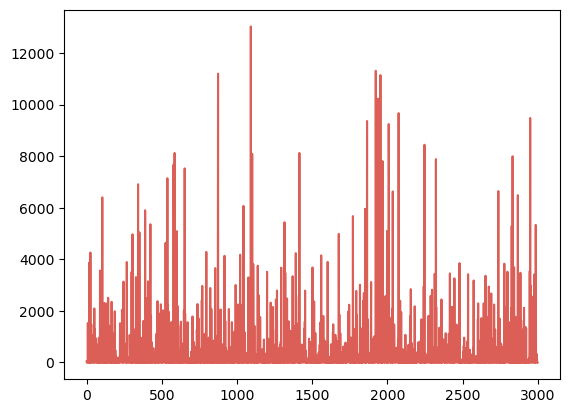

In [41]:
plt.plot(train['sales'])

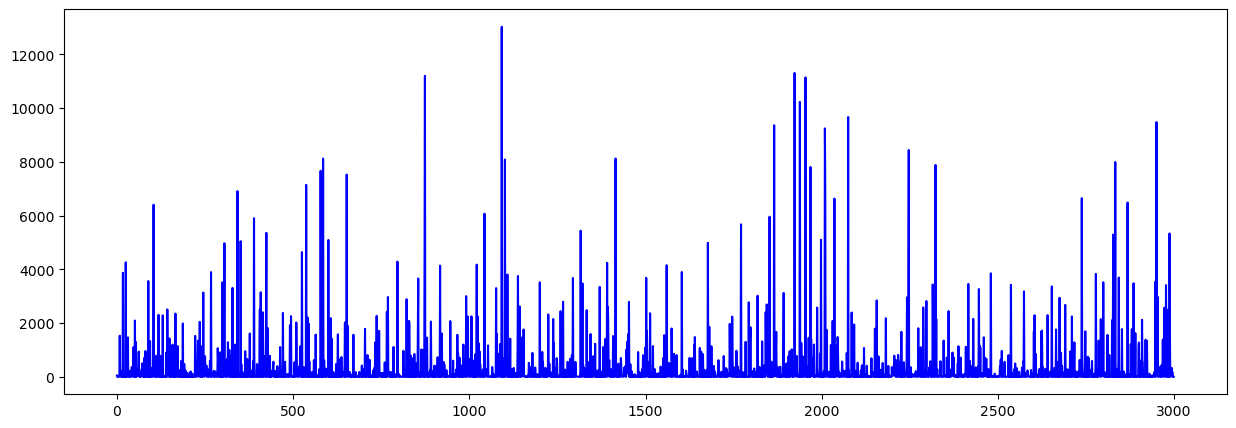

In [42]:
ax1 = train['sales'].plot(figsize=(15, 5), color='blue', label='Sales')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


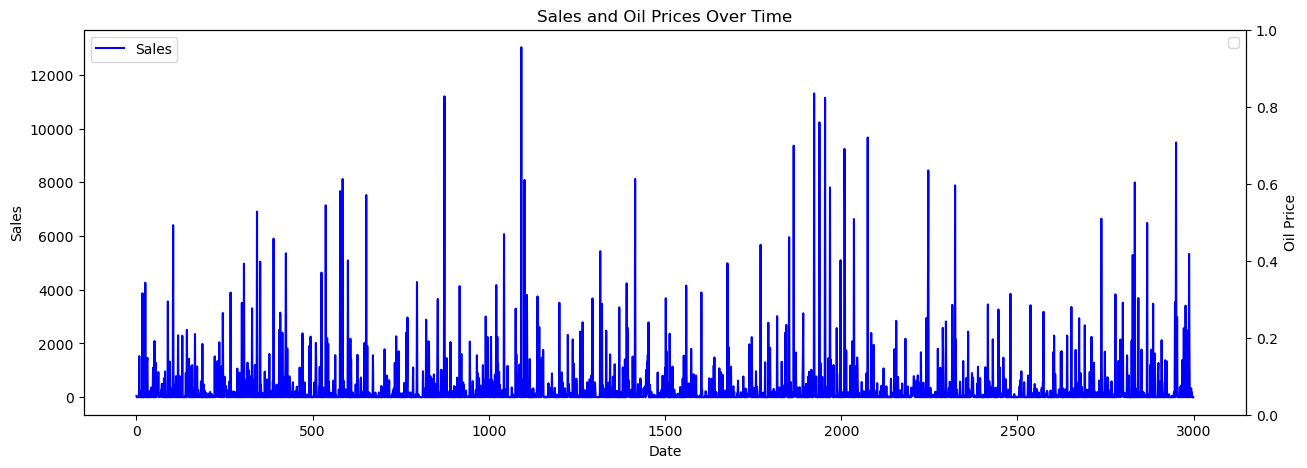

In [43]:
ax1 = train['sales'].plot(figsize=(15, 5), color='blue', label='Sales')
ax1.set_ylabel('Sales')
ax1.set_xlabel('Date')

# Creating a secondary y-axis for 'dcoilwtico' (oil prices)
ax2 = ax1.twinx()
# store_sales_O['dcoilwtico'].plot(color='green', label='Oil Price')
ax2.set_ylabel('Oil Price')

# Displaying the legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Sales and Oil Prices Over Time')
plt.show()

In [45]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        3000 non-null   int64  
 1   id           3000 non-null   int64  
 2   date         3000 non-null   object 
 3   store_nbr    3000 non-null   int64  
 4   family       3000 non-null   object 
 5   sales        3000 non-null   float64
 6   onpromotion  3000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 164.2+ KB


In [10]:
holidays_events.type.unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [11]:
# merge all available datasets for EDA (except holidays)

merge1 = pd.merge(train, oil, on='date', how='left')
merge2 = pd.merge(merge1, transactions, on=['date', 'store_nbr'], how='left')
merge3 = pd.merge(merge2, stores, on='store_nbr', how='left')

merge3.head()

,index,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster
0,170217,170217,2013-04-06,35,BEVERAGES,401.000,0,NaN,605.0,Playas,Guayas,C,3
1,1125611,1125611,2014-09-25,41,HARDWARE,0.000,0,93.59,867.0,Machala,El Oro,D,4
2,2813775,2813775,2017-05-02,9,PRODUCE,2739.654,139,47.65,2099.0,Quito,Pichincha,B,6
3,1235323,1235323,2014-11-26,20,BABY CARE,0.000,0,73.70,NaN,Quito,Pichincha,B,6
4,2686773,2686773,2017-02-20,45,GROCERY I,10458.000,63,NaN,3349.0,Quito,Pichincha,A,11


In [12]:
# drop holidays that were transferred and those that aren't national holidays

holidays_events = holidays_events[holidays_events.transferred != True]
holidays_events = holidays_events[holidays_events.locale == 'National']

holidays_events = holidays_events.drop(columns=['type', 'locale', 'locale_name', 'transferred'])

In [13]:
# merge national holidays with merge3 to create df for EDA

merge4 = pd.merge(merge3, holidays_events, on='date', how='left')
merge4.rename(columns={'description' : 'holiday'}, inplace=True)

df = merge4
df.head()

,index,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday
0,170217,170217,2013-04-06,35,BEVERAGES,401.000,0,NaN,605.0,Playas,Guayas,C,3,NaN
1,1125611,1125611,2014-09-25,41,HARDWARE,0.000,0,93.59,867.0,Machala,El Oro,D,4,NaN
2,2813775,2813775,2017-05-02,9,PRODUCE,2739.654,139,47.65,2099.0,Quito,Pichincha,B,6,NaN
3,1235323,1235323,2014-11-26,20,BABY CARE,0.000,0,73.70,NaN,Quito,Pichincha,B,6,NaN
4,2686773,2686773,2017-02-20,45,GROCERY I,10458.000,63,NaN,3349.0,Quito,Pichincha,A,11,NaN


In [14]:
df.isna().sum()

index              0
id                 0
date               0
store_nbr          0
family             0
sales              0
onpromotion        0
dcoilwtico       956
transactions     234
city               0
state              0
type               0
cluster            0
holiday         2745
dtype: int64

In [15]:
df.info()
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3011 entries, 0 to 3010
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         3011 non-null   int64  
 1   id            3011 non-null   int64  
 2   date          3011 non-null   object 
 3   store_nbr     3011 non-null   int64  
 4   family        3011 non-null   object 
 5   sales         3011 non-null   float64
 6   onpromotion   3011 non-null   int64  
 7   dcoilwtico    2055 non-null   float64
 8   transactions  2777 non-null   float64
 9   city          3011 non-null   object 
 10  state         3011 non-null   object 
 11  type          3011 non-null   object 
 12  cluster       3011 non-null   int64  
 13  holiday       266 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 329.5+ KB


,index,id,store_nbr,sales,onpromotion,dcoilwtico,transactions,cluster
count,3011.00,3011.00,3011.00,3011.00,3011.00,2055.00,2777.00,3011.00
mean,1495477.74,1495477.74,27.31,321.02,2.19,67.95,1707.29,8.43
std,859668.48,859668.48,15.61,1014.01,11.46,25.69,977.59,4.65
min,18.00,18.00,1.00,0.00,0.00,26.19,413.00,1.00
25%,754892.50,754892.50,14.00,0.00,0.00,46.23,1055.00,4.00
50%,1491734.00,1491734.00,27.00,10.00,0.00,53.77,1392.00,8.00
75%,2225571.50,2225571.50,41.00,181.32,0.00,95.58,2124.00,13.00
max,3000623.00,3000623.00,54.00,21718.00,289.00,110.62,8307.00,17.00


In [16]:
# fill null oil price values with interpolate method, and all others back/forward fill
num = [x for x in df.columns if df.dtypes[x] in ['float64']]

In [17]:
for i in num:
    df[i] = df[i].fillna(df[i].bfill())

In [18]:
df.isna().sum()

index              0
id                 0
date               0
store_nbr          0
family             0
sales              0
onpromotion        0
dcoilwtico         1
transactions       1
city               0
state              0
type               0
cluster            0
holiday         2745
dtype: int64

In [19]:
# write a function to create new columns for year, month, day, and day name

def date_features(x):
    x['date'] = pd.to_datetime(x['date'])

    x['year'] = x['date'].dt.year
    x['month'] = x['date'].dt.month
    x['day'] = x['date'].dt.day
    x['day_name'] = x['date'].dt.day_name()
    return x

df = date_features(df)
df.head()

,index,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,day,day_name
0,170217,170217,2013-04-06,35,BEVERAGES,401.000,0,93.59,605.0,Playas,Guayas,C,3,NaN,2013,4,6,Saturday
1,1125611,1125611,2014-09-25,41,HARDWARE,0.000,0,93.59,867.0,Machala,El Oro,D,4,NaN,2014,9,25,Thursday
2,2813775,2813775,2017-05-02,9,PRODUCE,2739.654,139,47.65,2099.0,Quito,Pichincha,B,6,NaN,2017,5,2,Tuesday
3,1235323,1235323,2014-11-26,20,BABY CARE,0.000,0,73.70,3349.0,Quito,Pichincha,B,6,NaN,2014,11,26,Wednesday
4,2686773,2686773,2017-02-20,45,GROCERY I,10458.000,63,95.47,3349.0,Quito,Pichincha,A,11,NaN,2017,2,20,Monday


In [22]:
# let's take a sample of our data so that EDA goes more smoothly

df1 = df.sample(n=3000).reset_index()

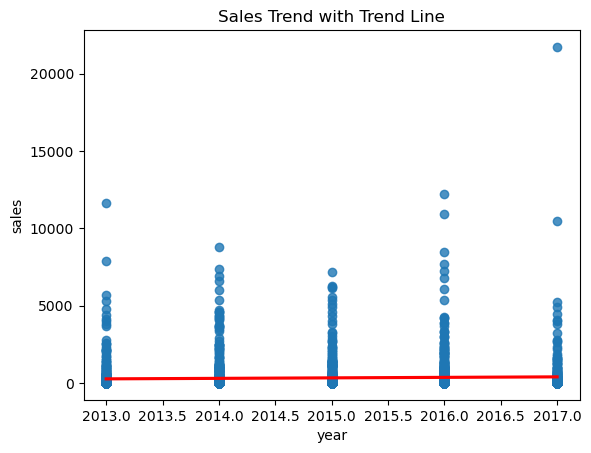

In [23]:
# Plotting the trend of the sales using lineplot
sns.regplot(data=df1, x='year', y='sales', ci=None, line_kws={"color": "red"})
plt.title('Sales Trend with Trend Line')
plt.show()

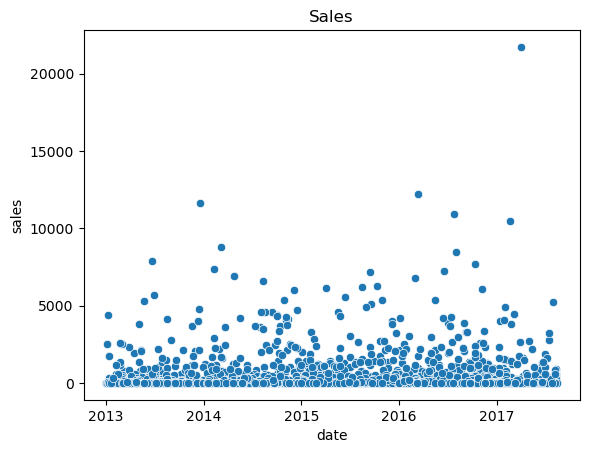

In [24]:
# checking scatter plot for outliers

ax = sns.scatterplot(data=df1, x='date', y='sales')
ax.set_title('Sales')
plt.show()

In [25]:
# getting rid of outliers in original df

for i in range(1,len(df.store_nbr.unique())+1):
    val = df[df.store_nbr == i].sales.quantile(0.99)
    df = df.drop(df[(df.store_nbr==i) & (df.sales > val)].index)

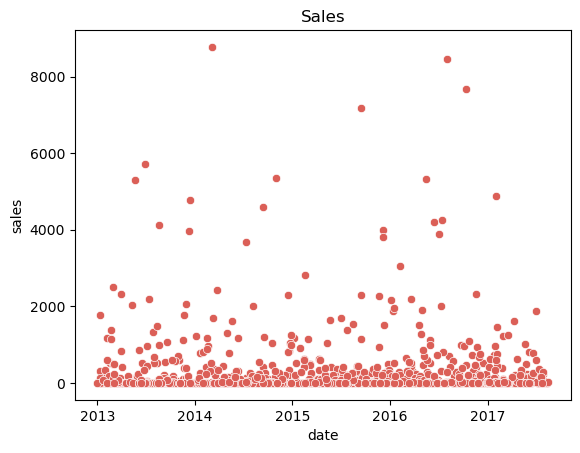

In [30]:
# checking scatter plot for outliers again

df1 = df.sample(n=1000).reset_index()

ax = sns.scatterplot(data=df1, x='date', y='sales')
ax.set_title('Sales')
plt.show()

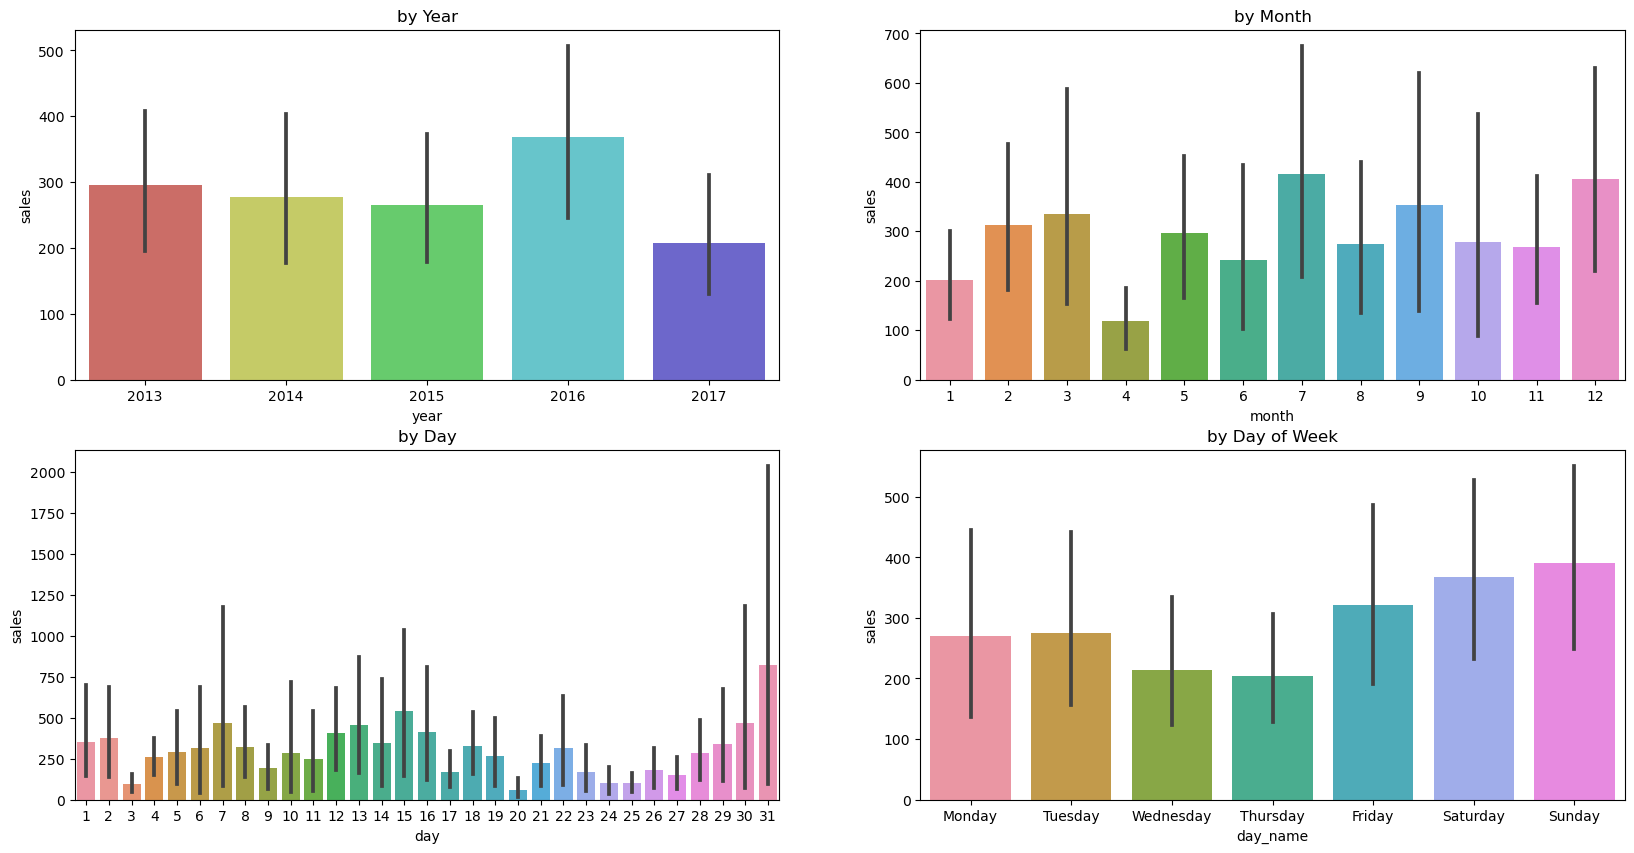

In [31]:
# viewing sales data

order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sns.set_palette('hls')
fig, axs = plt.subplots(2, 2, figsize=(20,10))

sns.barplot(x='year', y='sales', data=df1, ax=axs[0,0])
sns.barplot(x='month', y='sales', data=df1, ax=axs[0,1])
sns.barplot(x='day', y='sales', data=df1, ax=axs[1,0])
sns.barplot(x='day_name', y='sales', data=df1, ax=axs[1,1], order=order)

axs[0,0].set_title('by Year')
axs[0,1].set_title('by Month')
axs[1,0].set_title('by Day')
axs[1,1].set_title('by Day of Week')
plt.show()

Observations:
Sales have been steadily increasing from 2013 to 2017
Sales are higher in December
Sales are higher towards the beginning of the month
Sales are higher on weekends
We will use this information for feature engineering later

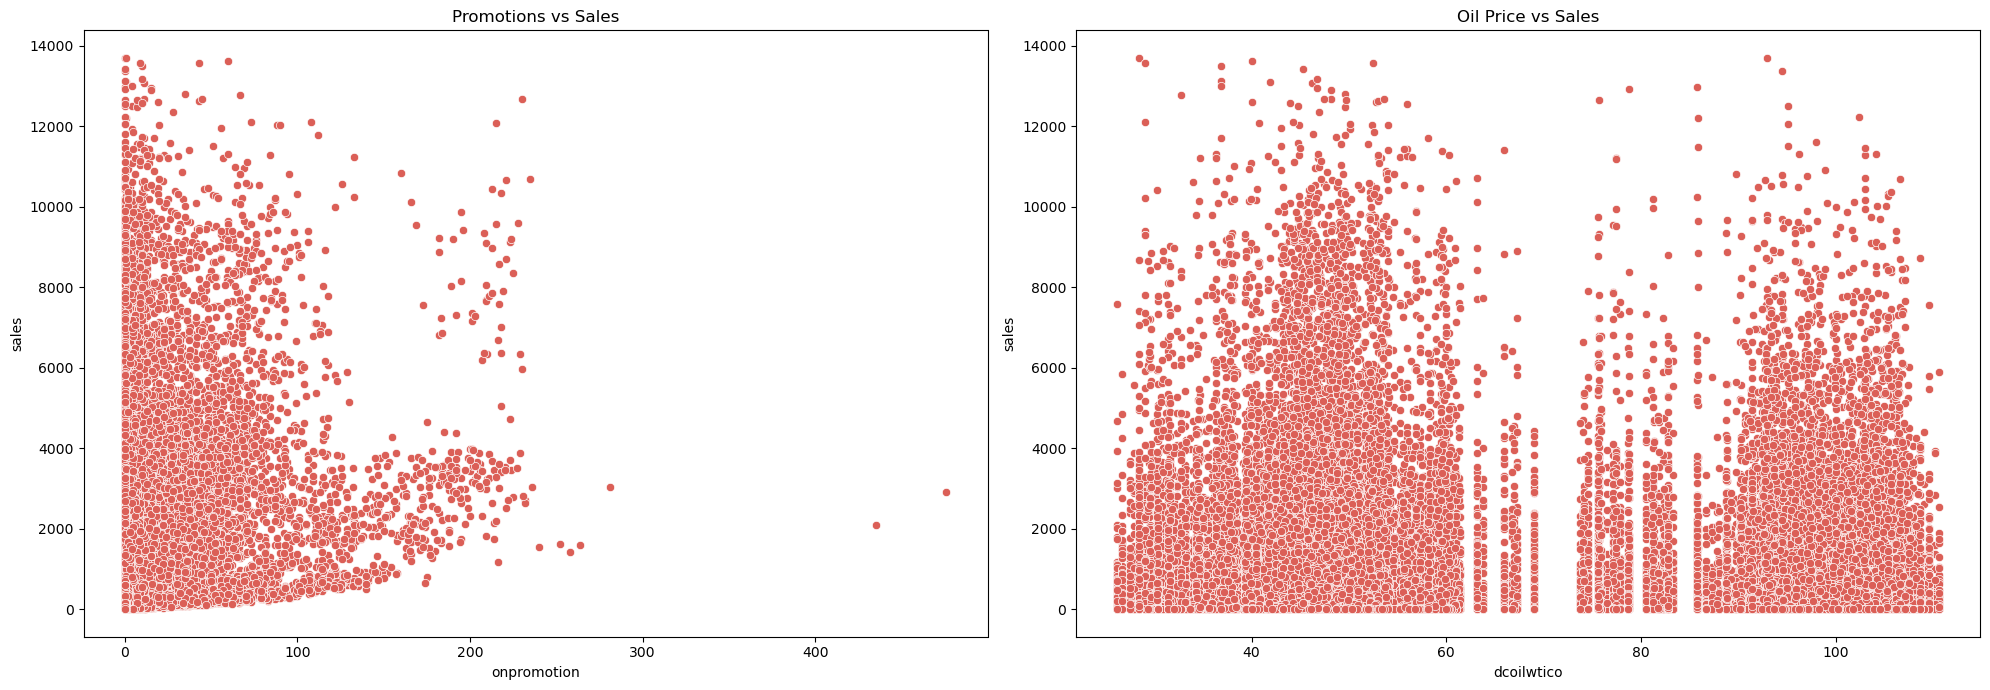

In [99]:
# let's see the effect promotions and oil prices have on sales

fig, axs = plt.subplots(1, 2, figsize=(20,7))

sns.scatterplot(data=df1, x='onpromotion', y='sales', ax=axs[0])
ax = sns.scatterplot(data=df1, x='dcoilwtico', y='sales', ax=axs[1])

axs[0].set_title('Promotions vs Sales')
axs[1].set_title('Oil Price vs Sales')

plt.tight_layout()
plt.show()

<Axes: xlabel='onpromotion', ylabel='sales'>

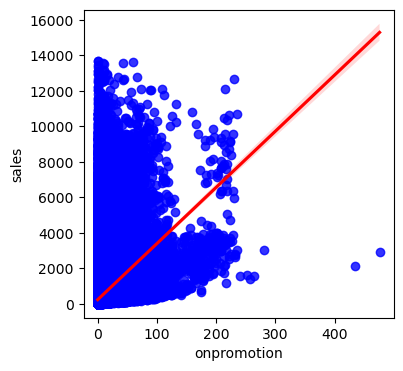

In [131]:
# Plotting the relationship between onpromotion and sales using a regplot
plt.figure(figsize=(4, 4))
sns.regplot(data=df1, x='onpromotion', y='sales',color='blue', line_kws={'color': 'red'})

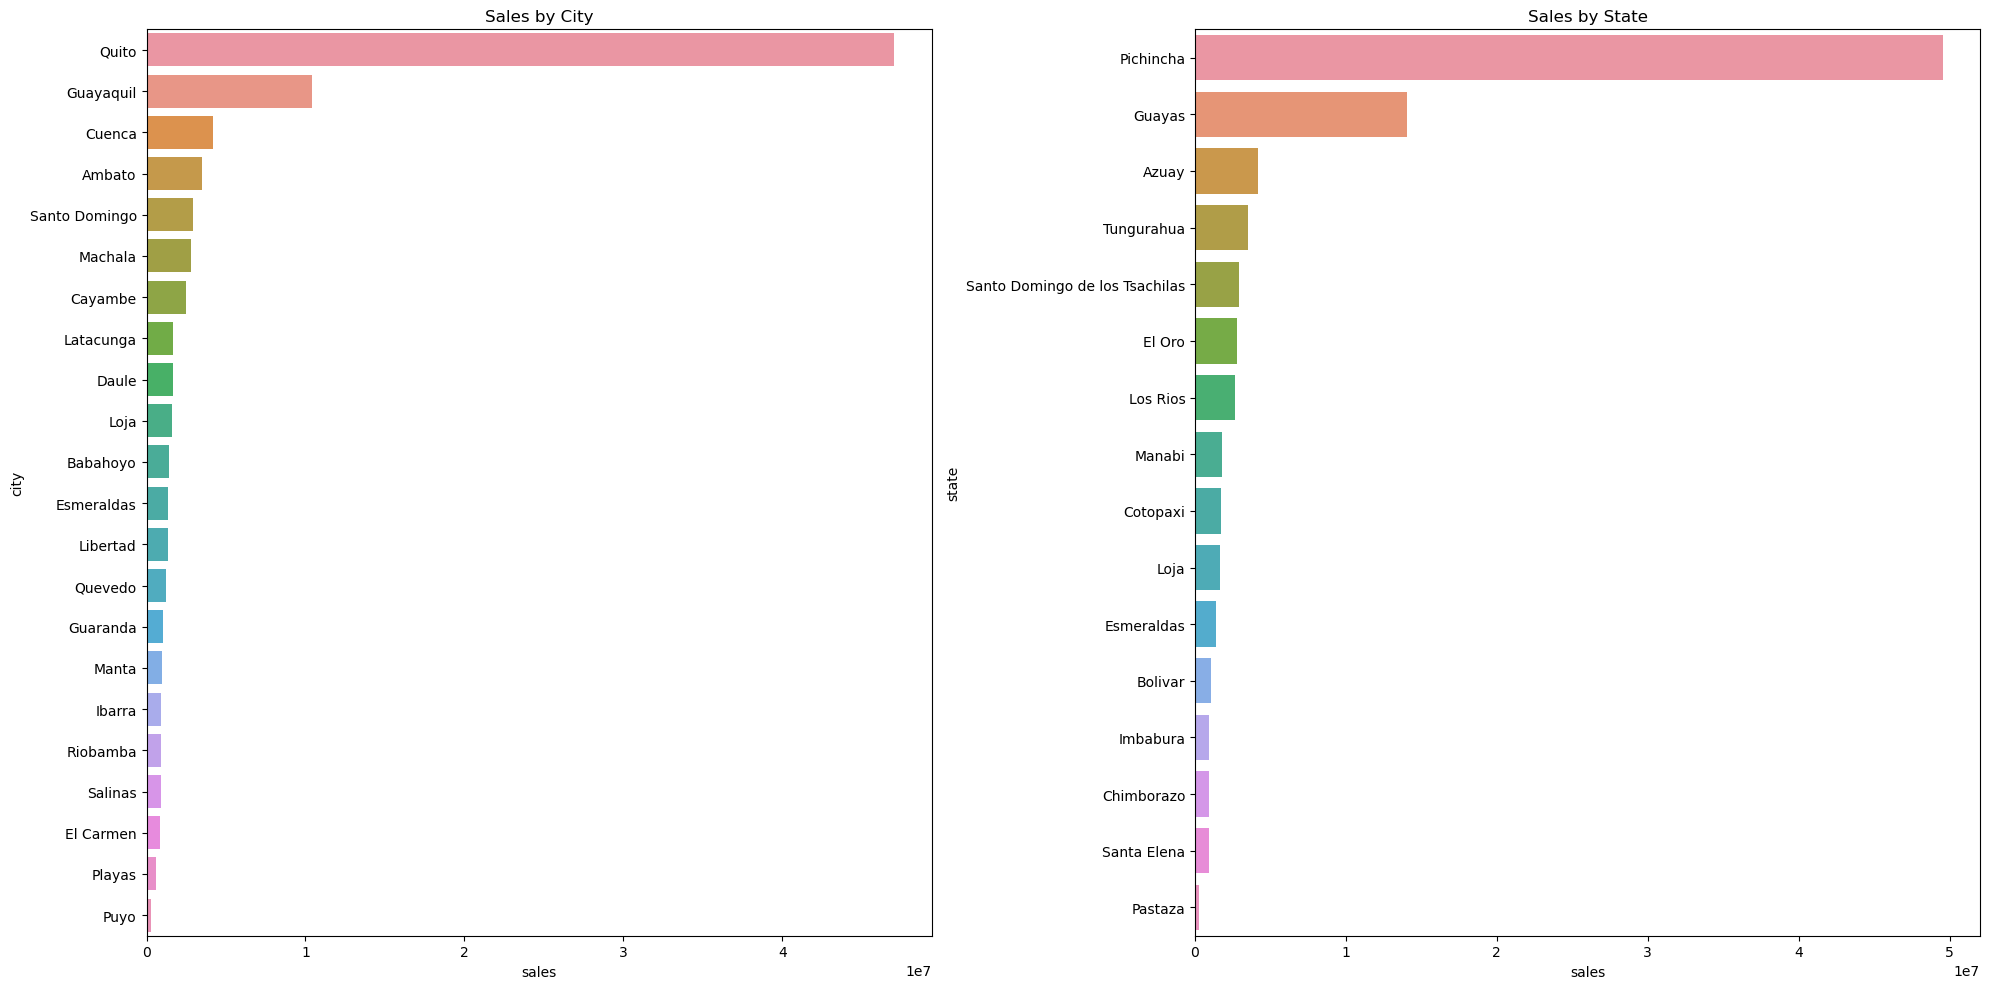

In [100]:
# let's see which cities are selling the most

fig, axs = plt.subplots(1, 2, figsize=(20,10))

sns.barplot(x='sales', y='city', data=df1.groupby('city')['sales'].sum().reset_index().sort_values('sales', ascending = False), ax=axs[0])
sns.barplot(x='sales', y='state', data=df1.groupby('state')['sales'].sum().reset_index().sort_values('sales', ascending = False), ax=axs[1])

axs[0].set_title('Sales by City')
axs[1].set_title('Sales by State')

plt.tight_layout()
plt.show()

In [101]:
# let's check out the product families and see if we can consolidate them a bit

np.sort(df.family.unique())

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [102]:
# how is the product family

# first evaluate by sum of sales 

familypivot = pd.DataFrame()
familypivot = df.groupby(by='family')['sales'].sum().sort_values(ascending=False).reset_index()
familypivot.head()

# then evaluate by percentage of sales

total = familypivot['sales'].sum()
familypivot['percentage']=(familypivot['sales']/total)

familypivot.head()

,family,sales,percentage
0,GROCERY I,2.198273e+08,0.244178
1,BEVERAGES,1.843857e+08,0.204811
2,PRODUCE,1.055710e+08,0.117265
3,CLEANING,9.715241e+07,0.107914
4,DAIRY,6.462747e+07,0.071786


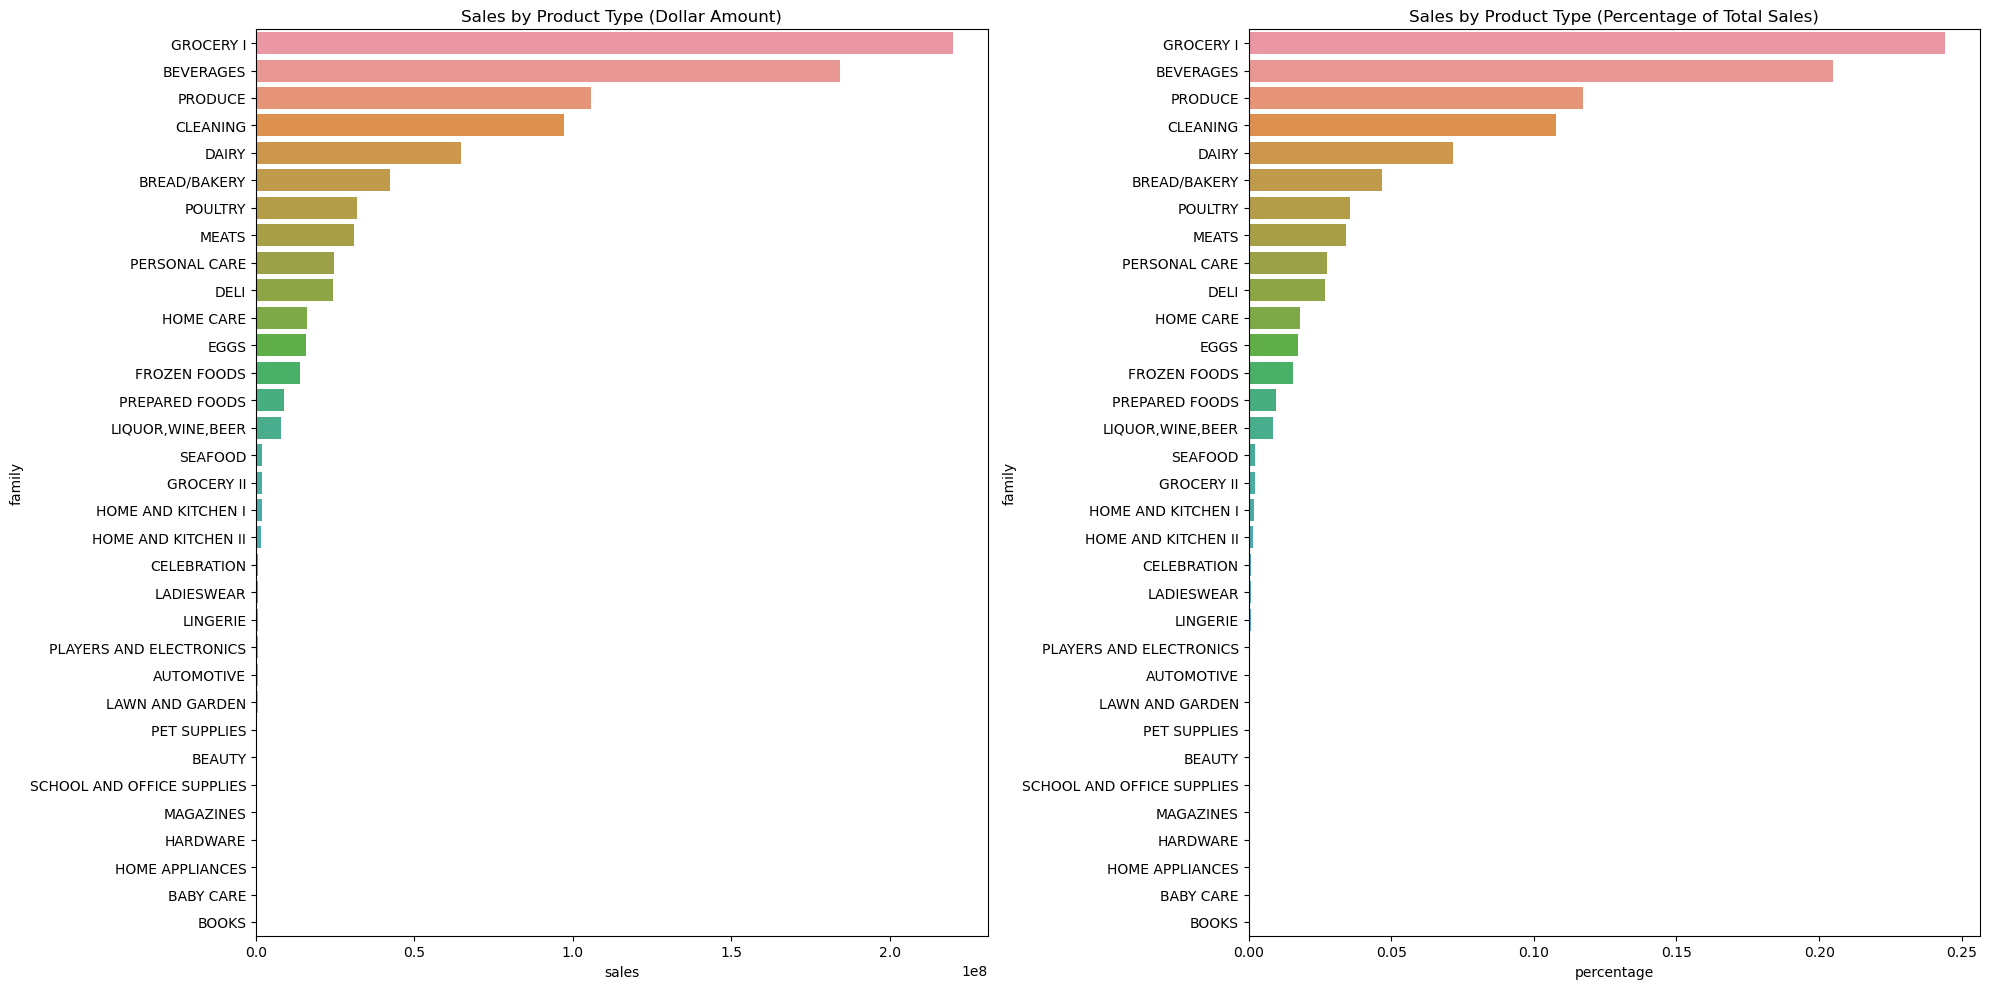

In [103]:
# visualize sales by the raw dollar amount and as a percentage of total sales

fig, axs = plt.subplots(1, 2, figsize=(20,10))

sns.barplot(data=familypivot, x='sales', y='family', ax=axs[0])
sns.barplot(data=familypivot, x='percentage', y='family', ax=axs[1])

axs[0].set_title('Sales by Product Type (Dollar Amount)')
axs[1].set_title('Sales by Product Type (Percentage of Total Sales)')

plt.tight_layout()
plt.show()

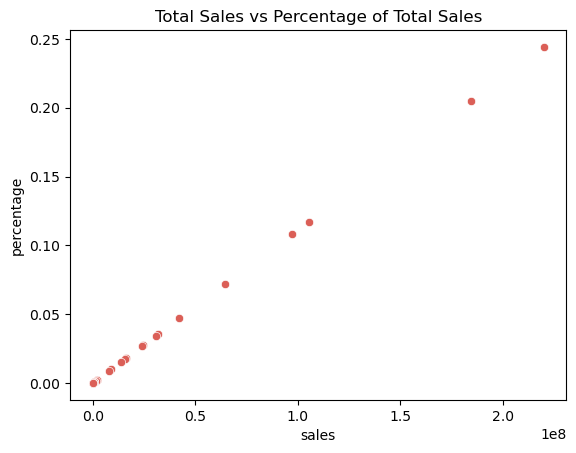

In [104]:
ax = sns.scatterplot(data=familypivot, x='sales', y='percentage')
ax.set_title('Total Sales vs Percentage of Total Sales')

plt.show()

In [105]:
family_map       = {'AUTOMOTIVE': 'rest',
                   'BABY CARE': 'rest',
                   'BEAUTY': 'rest',
                   'BOOKS': 'rest',
                   'CELEBRATION': 'rest',
                   'GROCERY II': 'rest',
                   'HARDWARE': 'rest',
                   'HOME AND KITCHEN I': 'rest',
                   'HOME AND KITCHEN II': 'rest',
                   'HOME APPLIANCES': 'rest',
                   'LADIESWEAR': 'rest',
                   'LAWN AND GARDEN': 'rest',
                   'LINGERIE': 'rest',
                   'MAGAZINES': 'rest',
                   'PET SUPPLIES': 'rest',
                   'PLAYERS AND ELECTRONICS': 'rest',
                   'SCHOOL AND OFFICE SUPPLIES': 'rest',
                   'SEAFOOD': 'rest',
                   'DELI': 'fifth',
                    'EGGS': 'sixth',
                    'FROZEN FOODS': 'sixth',
                    'HOME CARE': 'sixth',
                    'LIQUOR,WINE,BEER': 'sixth',
                    'PREPARED FOODS': 'sixth',
                    'PERSONAL CARE': 'fifth',
                    'BREAD/BAKERY': 'fourth',
                    'MEATS': 'fifth',
                    'POULTRY': 'third',
                    'CLEANING':'third',
                    'DAIRY':'fourth',
                    'PRODUCE':'third',
                    'BEVERAGES':'second',
                    'GROCERY I': 'first'
                   }

df['new_family'] = df['family'].map(family_map)
df.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,day,day_name,new_family
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,770.0,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,770.0,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,770.0,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,770.0,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,second
4,4,2013-01-01,1,BOOKS,0.0,0,93.14,770.0,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest


In [106]:
# dropping the old family column because we don't need it anymore

df2 = df.drop(columns=['family'])
df2.head()

,id,date,store_nbr,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,day,day_name,new_family
0,0,2013-01-01,1,0.0,0,93.14,770.0,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest
1,1,2013-01-01,1,0.0,0,93.14,770.0,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest
2,2,2013-01-01,1,0.0,0,93.14,770.0,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest
3,3,2013-01-01,1,0.0,0,93.14,770.0,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,second
4,4,2013-01-01,1,0.0,0,93.14,770.0,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest


In [107]:
# replace holiday column values with "yes" if there is a national holiday

def replace_non_null(x):
    x.loc[x['holiday'].notnull(), 'holiday'] = 'yes'
    x.loc[x['holiday'].isnull(), 'holiday'] = 'no'
    return x

df2 = replace_non_null(df2)

In [108]:
df2.holiday.unique()

array(['yes', 'no'], dtype=object)

In [109]:
df2['holiday'] = df2['holiday'].map({'yes':True, 'no':False})

In [110]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2977895 entries, 0 to 3008015
Data columns (total 17 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   sales         float64       
 4   onpromotion   int64         
 5   dcoilwtico    float64       
 6   transactions  float64       
 7   city          object        
 8   state         object        
 9   type          object        
 10  cluster       int64         
 11  holiday       bool          
 12  year          int32         
 13  month         int32         
 14  day           int32         
 15  day_name      object        
 16  new_family    object        
dtypes: bool(1), datetime64[ns](1), float64(3), int32(3), int64(4), object(5)
memory usage: 355.0+ MB


In [111]:
# df2['holiday'] = df2['holiday'].apply(lambda x:'True' if x['holiday'].notnull() else  'False')

In [112]:
df2.holiday.unique()

array([ True, False])

# 2. Predictive Analysis

In [113]:
from sklearn.model_selection import train_test_split

X, y = df2.drop('sales', axis=1), df2[['sales']]

In [70]:
# non_numeric_list_X7 = df2.dtypes[(df2.dtypes == 'bool') | (df2.dtypes == 'object')].index

In [71]:
non_numeric_list_X7

Index(['city', 'state', 'type', 'holiday', 'day_name', 'new_family'], dtype='object')

In [ ]:
# for i in non_numeric_list_X:
#     X[i] = X[i].fillna(X[i].mode()[0])

In [ ]:
# for i in non_numeric_list_X:
#     X[i] = X[i].astype('category')

In [ ]:
# train = [x for x in X.columns if X.dtypes[x] in ['date', 'bool', 'object']]

In [ ]:
# for i in train:
#     X[i] = X[i].astype('category')

In [114]:
cats = X.select_dtypes(exclude=np.number).columns.tolist()

for col in cats:
    X[col] = X[col].astype('category')
    
X.dtypes

id                 int64
date            category
store_nbr          int64
onpromotion        int64
dcoilwtico       float64
transactions     float64
city            category
state           category
type            category
cluster            int64
holiday         category
year               int32
month              int32
day                int32
day_name        category
new_family      category
dtype: object

In [72]:
# split data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [115]:
# create regression matrices

import xgboost as xgb

dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [116]:
# generating predictions and testing model

from sklearn.metrics import mean_squared_error

params = {"objective": "reg:squarederror"}
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]
n = 5000

model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=250, # every 250 rounds
   early_stopping_rounds=50 # stop the training if validation loss doesn't improve for 50 consecutive rounds
)

preds = model.predict(dtest_reg)

rmse = mean_squared_error(y_test, preds, squared=False)

print(f"RMSE: {rmse:.3f}")

[0]	train-rmse:676.27062	validation-rmse:680.04048
[250]	train-rmse:224.00748	validation-rmse:292.59340
[287]	train-rmse:221.02684	validation-rmse:294.63314
RMSE: 294.633


In [117]:
merge4

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,day,day_name
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,93.14,770.0,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.000,0,93.14,770.0,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday
2,2,2013-01-01,1,BEAUTY,0.000,0,93.14,770.0,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.000,0,93.14,770.0,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday
4,4,2013-01-01,1,BOOKS,0.000,0,93.14,770.0,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008011,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,2155.0,Quito,Pichincha,B,6,NaN,2017,8,15,Tuesday
3008012,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,2155.0,Quito,Pichincha,B,6,NaN,2017,8,15,Tuesday
3008013,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,2155.0,Quito,Pichincha,B,6,NaN,2017,8,15,Tuesday
3008014,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,2155.0,Quito,Pichincha,B,6,NaN,2017,8,15,Tuesday


In [121]:
# prepare test df for evaluation

merge1 = pd.merge(test, oil, on='date', how='left')
merge2 = pd.merge(merge1, transactions, on=['date', 'store_nbr'], how='left')
merge3 = pd.merge(merge2, stores, on='store_nbr', how='left')

merge4 = pd.merge(merge3, holidays_events, on='date', how='left')
merge4.rename(columns={'description' : 'holiday'}, inplace=True)

testdf1 = merge4

# adding oil prices and date features

# testdf1['dcoilwtico'] = oil(testdf1['dcoilwtico'])
# testdf1 = date_features(testdf1)


# replace family

testdf1['new_family'] = testdf1['family'].map(family_map)
testdf1 = testdf1.drop(columns=['family'])

# replace holidays with yes or null

testdf1 = replace_non_null(testdf1)

testdf1.head()

,id,date,store_nbr,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,new_family
0,3000888,2017-08-16,1,0,46.8,NaN,Quito,Pichincha,D,13,no,rest
1,3000889,2017-08-16,1,0,46.8,NaN,Quito,Pichincha,D,13,no,rest
2,3000890,2017-08-16,1,2,46.8,NaN,Quito,Pichincha,D,13,no,rest
3,3000891,2017-08-16,1,20,46.8,NaN,Quito,Pichincha,D,13,no,second
4,3000892,2017-08-16,1,0,46.8,NaN,Quito,Pichincha,D,13,no,rest


In [122]:
# convert non-numerical columns into categorical data type

cats = testdf1.select_dtypes(exclude=np.number).columns.tolist()

for col in cats:
    testdf1[col] = testdf1[col].astype('category')

In [123]:
# run again on test df

testdf1_matrix = xgb.DMatrix(testdf1, enable_categorical=True)
predictions = model.predict(testdf1_matrix)
testdf1['sales'] = predictions

# change any negative predictions to zero

testdf1['sales'] = testdf1['sales'].clip(lower=0)

ValueError: feature_names mismatch: ['id', 'date', 'store_nbr', 'onpromotion', 'dcoilwtico', 'transactions', 'city', 'state', 'type', 'cluster', 'holiday', 'year', 'month', 'day', 'day_name', 'new_family'] ['id', 'date', 'store_nbr', 'onpromotion', 'dcoilwtico', 'transactions', 'city', 'state', 'type', 'cluster', 'holiday', 'new_family']
expected day_name, day, year, month in input data